In [1]:
from tqdm.auto import tqdm
from policy_runner import define_actions, define_policies, run_policies
import matplotlib.pyplot as plt
import numpy as np

C:\Users\mysh\miniconda3\envs\rl-toolbox\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
actions = define_actions(10)

for action in actions:
    print(f"Action {action.name}: average reward = {action.average_reward}")

Action 1: average reward = 0.07863522200405385
Action 2: average reward = 0.04918979979098218
Action 3: average reward = -0.5331534399619904
Action 4: average reward = -0.2688218524567594
Action 5: average reward = -0.4740762307824183
Action 6: average reward = -0.30943836436463334
Action 7: average reward = 2.3377573970590153
Action 8: average reward = -0.4573112527333906
Action 9: average reward = -0.5516718232292768
Action 10: average reward = 0.11214301579712317


In [3]:
policies = define_policies(actions)
run_policies(policies, 10)

{'greedy r$_0$=0': array([ 0.35355694,  0.20220543, -0.39290944, -0.26252884,  1.97584475,
         0.65454999, -0.01255667, -0.56381025, -0.77077434,  0.02296412]),
 'greedy r$_0$=5': array([-2.81561362, -0.23411785,  0.7712739 , -0.02629677, -0.66189013,
         2.88038141, -0.45189411, -1.20004097,  3.64023537, -2.40155561]),
 'epsilon-greedy $\\epsilon$=0.1': array([-0.67326002, -1.64493561,  0.27479259, -0.57211008,  1.29110084,
        -1.65662946,  2.29402882,  2.2275038 ,  2.87296234,  2.10533395]),
 'epsilon-greedy $\\epsilon$=0.01': array([ 0.98263854, -0.4160677 , -0.28571351, -1.45023155, -0.4984168 ,
        -2.51520513,  1.67476553, -1.66503636,  1.60389814,  0.23695552]),
 'UCB c=2': array([ 0.13539397,  0.89962662, -0.56593255,  2.26783089,  1.53386153,
        -0.39520658,  0.29991842, -2.1719753 , -1.30602625,  1.75772041])}

In [4]:
def average_runs(prev, new, idx):
    if prev is None:
        return new

    assert set(prev.keys()) == set(new.keys())
    for name, old_res in prev.items():
        prev[name] = old_res + (new[name] - old_res) / idx

    return prev


In [5]:
POLICY_RUN_STEPS = 1000
REPEAT = 2000

combined_results = None

for i in tqdm(range(REPEAT), desc="Evaluation iteration"):
    actions = define_actions(10)
    policies = define_policies(actions)
    new_results = run_policies(policies, POLICY_RUN_STEPS)
    combined_results = average_runs(combined_results, new_results, i)


Evaluation iteration: 100%|██████████| 2000/2000 [00:47<00:00, 42.51it/s]


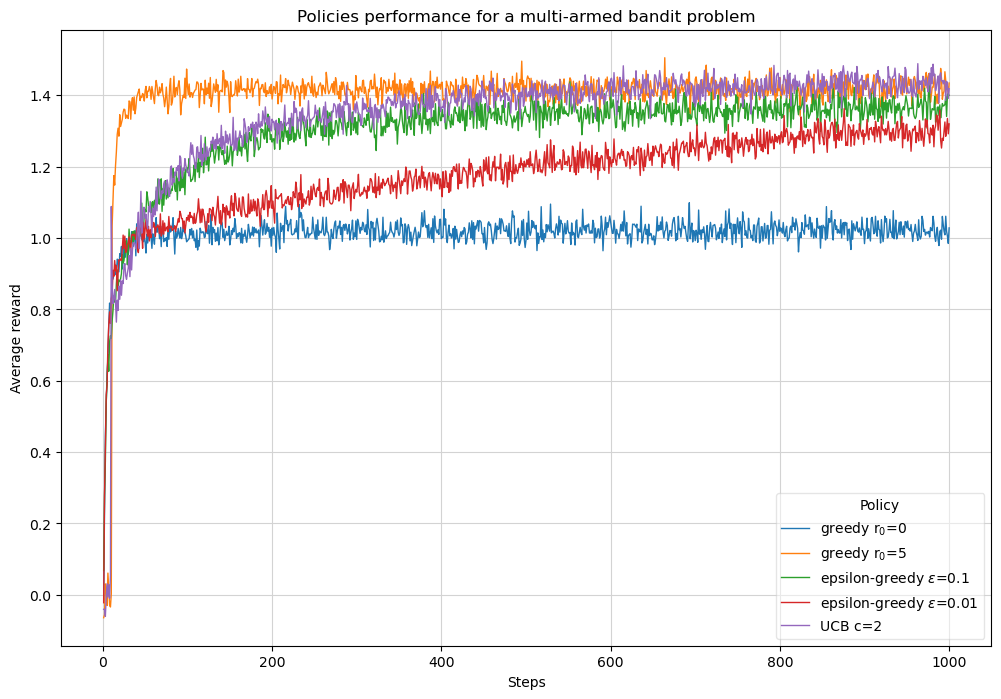

In [7]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(color='lightgrey')
x = np.arange(POLICY_RUN_STEPS) + 1
for policy_name, policy_result in combined_results.items():
    ax.plot(x, policy_result, label=policy_name, lw=1)
ax.legend(title="Policy", fancybox=True, framealpha=0.5)
ax.set_ylabel("Average reward")
ax.set_xlabel("Steps")
_ = ax.set_title("Policies performance for a multi-armed bandit problem")